In [5]:
# 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Load your original CSV
df = pd.read_csv('dataset/heg_sample_data.csv')

# 3. Define preprocessing function
def proc_df(df):
    df = df.copy()
    
    # Outcome mapping: 1 = Death, else = Live
    df['Outcome Label'] = df['outcome'].apply(lambda x: 'Death' if x == 1 else 'Live')
    
    # Sex mapping: assuming 0 = Female, 1 = Male
    if 'document.sexo' in df.columns:
        df['Sex'] = df['document.sexo'].map({0: 'Female', 1: 'Male'})
    
    # ICU mapping: assuming 0 = No, 1 = Yes
    if 'UTI' in df.columns:
        df['ICU'] = df['UTI'].map({0: 'No', 1: 'Yes'})
    
    return df

# 4. Preprocess the data
df_proc = proc_df(df)

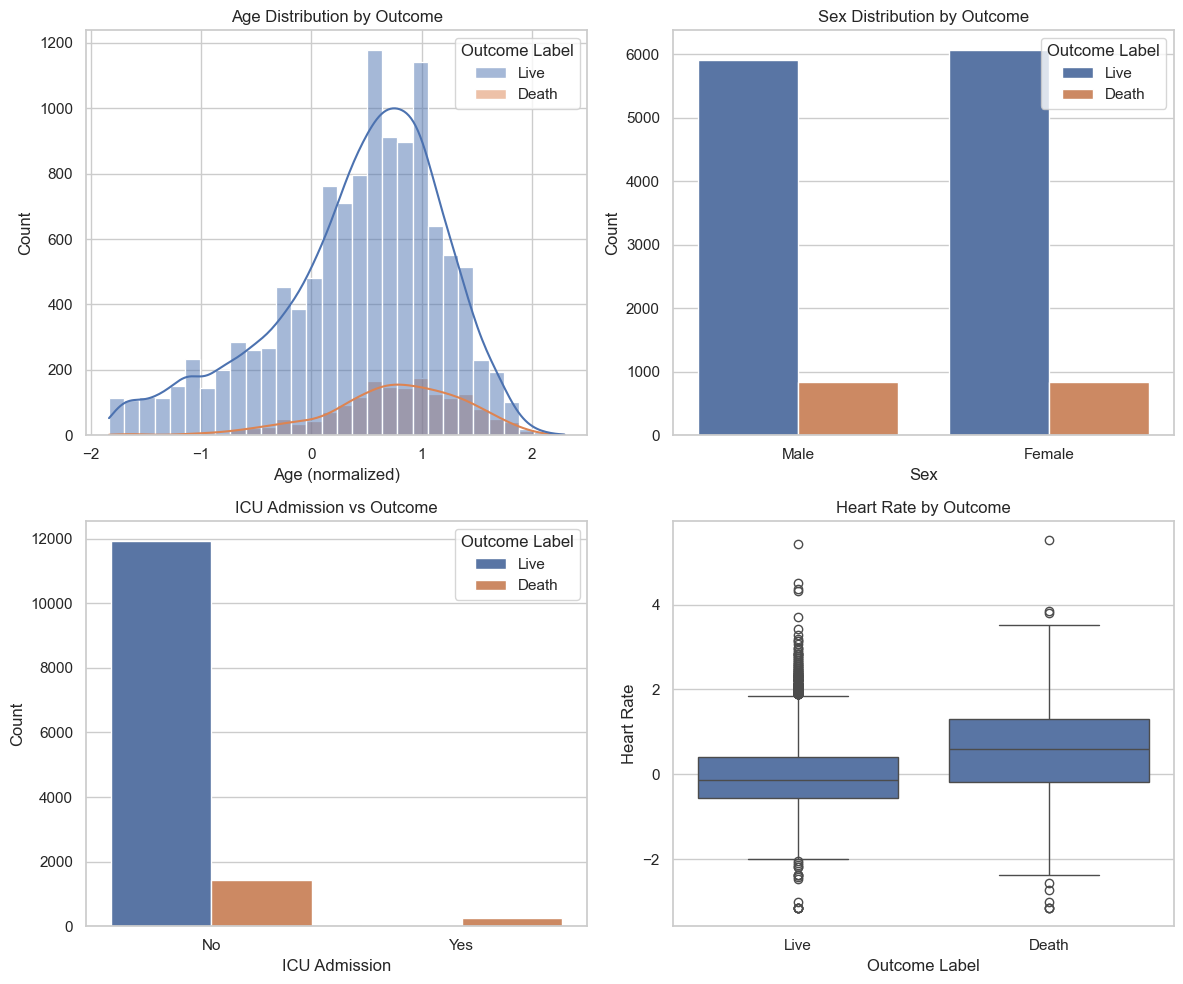

In [6]:

# 5. Save the processed data to a new CSV file
# df_proc.to_csv('ehr_data_processed.csv', index=False)

# 6. Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Age distribution by outcome
plt.subplot(2, 2, 1)
sns.histplot(data=df_proc, x='age', hue='Outcome Label', kde=True, bins=30)
plt.title('Age Distribution by Outcome')
plt.xlabel('Age (normalized)')
plt.ylabel('Count')

# Sex vs Outcome
plt.subplot(2, 2, 2)
sns.countplot(data=df_proc, x='Sex', hue='Outcome Label')
plt.title('Sex Distribution by Outcome')
plt.xlabel('Sex')
plt.ylabel('Count')

# ICU Admission vs Outcome
plt.subplot(2, 2, 3)
sns.countplot(data=df_proc, x='ICU', hue='Outcome Label')
plt.title('ICU Admission vs Outcome')
plt.xlabel('ICU Admission')
plt.ylabel('Count')

# Heart Rate by Outcome
plt.subplot(2, 2, 4)
sns.boxplot(data=df_proc, x='Outcome Label', y='document.freq_cardiaca(t)')
plt.title('Heart Rate by Outcome')
plt.ylabel('Heart Rate')

plt.tight_layout()
plt.show()

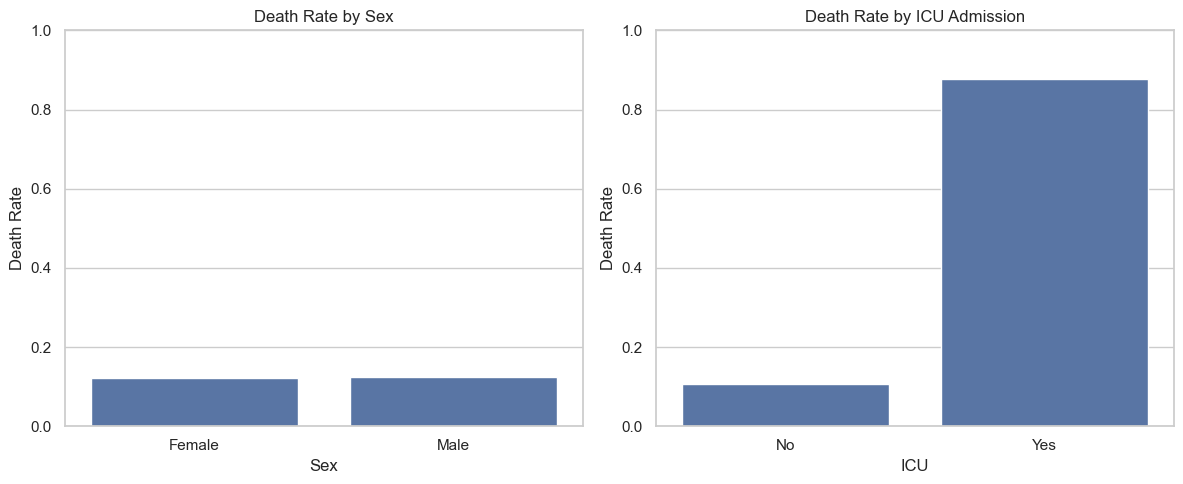

In [7]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Death rate by Sex
plt.subplot(1, 2, 1)
sex_death_rate = df_proc.groupby('Sex')['outcome'].mean().reset_index()
sns.barplot(data=sex_death_rate, x='Sex', y='outcome')
plt.title('Death Rate by Sex')
plt.ylabel('Death Rate')
plt.ylim(0, 1)

# 2. Death rate by ICU admission
plt.subplot(1, 2, 2)
icu_death_rate = df_proc.groupby('ICU')['outcome'].mean().reset_index()
sns.barplot(data=icu_death_rate, x='ICU', y='outcome')
plt.title('Death Rate by ICU Admission')
plt.ylabel('Death Rate')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

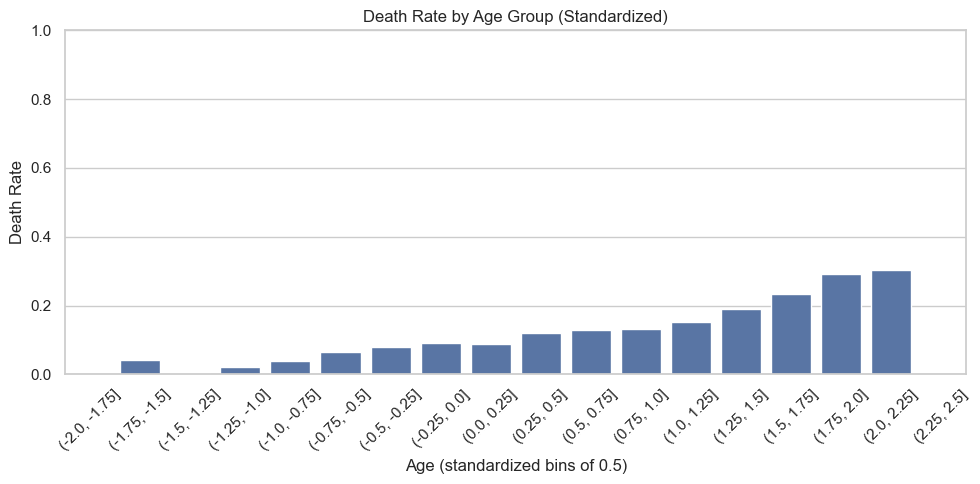

In [4]:
# 1. 나이를 0.5 간격으로 구간화
df_proc['age_bin'] = pd.cut(df_proc['age'], bins=np.arange(-2, 2.75, 0.25))

# 2. 구간별 사망률 계산
age_death_rate = df_proc.groupby('age_bin', observed=True)['outcome'].mean().reset_index()

# 3. 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=age_death_rate, x='age_bin', y='outcome')
plt.xticks(rotation=45)
plt.title('Death Rate by Age Group (Standardized)')
plt.xlabel('Age (standardized bins of 0.5)')
plt.ylabel('Death Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 나이 높을 수록 사망률 증가